# 09 - Non Compliance and LATE

## "Heterogeneous"의 세계에 발을 담가봅시다

이전 챕터에서, 보다 전통적인 도구 변수에 대해서 배워봤습니다. IV는 실험을 할 때, 활용할 수 있는 자연스러운 실험으로 여겨졌습니다. 하지만, 현대의 많은 IV를 활용한 의학 실험에서 많은 통찰을 얻었습니다. 도구 변수에 어떻게 반응하느냐에 따라 4가지 종류의 주제로 나눕니다.

1. Compliers
2. Never Takers
3. Always Takers
4. Defieres

이러한 이름은 약학에서 가져온 것입니다. 여러분이 어떤 질병에 대한 신약의 효과를 테스트하기 위해 실험을 수행하고 있다고 상상해보세요. 각 피실험자는 진짜 약물 또는 위약을 할당 받습니다. 여기서 Compliers는 할당된 약물 또는 위약을 거부감 없이 복용하는 집단을 말합니다. 만약에 Compliers가 진짜 약을 할당 받으면, 거부없이 복용할 것이고 반대도 마찬가지 일 것입니다. Never Takers는 할당 받은 약의 복용(Treatment)을 거부 또는 받지 않는 사람입니다. Never Takers는 어떠한 약을 할당받아도 복용하지 않습니다. 반면에 Always taker는 약 할당과 별개로 항상 진짜 약물을 복용하는 사람들입니다. 마지막으로 Defiers는 통제에 할당되면 Treatment를 받고, Treatment를 할당 받으면 통제를 받는 즉, 할당과 반대로 움직이는 청개구리 아이라고 생각하시면 됩니다.실제에서는 Defiers는 그렇게 일반적이지 않아서 무시하고 진행합니다.

![img](./data/img/late/defiers.png)

 IV 실험에서는 도구변수를 compliance를 완벽하게 고려하지 않은 준실험 설계로 생각합니다(즉, Compliers 그룹에만 해당하는 인과 효과). 즉, 내부적으로 유효한 인과 효과와 외부적으로 유효한 인과 효과를 구별해야 합니다.내부적으로 유효한 효과는 특정 데이터 그리고 특정 설정에서만 유효하며, IV에서는 설정한 도구변수가 Treatment를 변경하는 사람들에게 대한 ATE가 될 것입니다. 반면에 외적 타당도(External validity)는 그 인과적 효과의 예측력과 관련이 있습니다. 이는 우리가 이 표본에서 발견한 효과를 다른 모집단에 대해 일반화할 수 있는지에 대한 질문입니다. 예를 들어, 기부에 대한 인센티브가 주어졌을 때 사람들이 얼마나 기부를 할지에 대해 실험을 설계했다고 가정해 보겠습니다. 실험은 잘 설계 되었지만, 경제학과 학생들만 참여하도록 합니다. 그렇다면 실험에서 그들이 이기적인 바보라는 것을 발견할 것입니다. 이러한 사실이 비록 내부적으로 유효한 결론이지만 ,해당 데이터 포인트에서만 유효하지만 이 실험의 결과가 인류가 이기적이라고 추론할 수 없습니다. 따라서 우리는 해당 실험이 과연 외부적 타당성을 가지고 있는지에 대한 의문을 품을 수 있습니다. 

 도구변수로 돌아와서, 인앱 구매로 측정된 사용자 참여(user engagement)를 높이고 싶습니다. user engagement를 늘리기 위해 마케팅 부서에 engagement를 늘리는 push 마케팅을 요청할 수 있습니다. push 디자인과 설계를 잘해서 10000명의 무작위 고객을 선택하여 각 50%의 확률로 push를 할당합니다. 하지만 이러한 테스트를 진행할 때, 일부 고객이 Push를 거부하여 받지 못한다는 것을 알 수 있습니다. 또는 구형 스마트폰일 수도 있구요. 
 처음에는 이것이 별거 아니라고 생각할 수 있지만, 인과 추론의 문제에서 이는 그렇게 간단한 문제는 아닙니다.

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import style
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf
from linearmodels.iv import IV2SLS
import graphviz as gr

%matplotlib inline

style.use("fivethirtyeight")

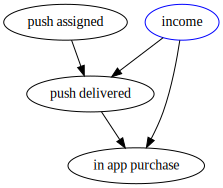

In [3]:
g = gr.Digraph()

g.edge("push assigned", "push delivered")
g.edge("push delivered", "in app purchase")
g.edge("income", "in app purchase")
g.edge("income", "push delivered")
g.node("income", color="blue")
g


위의 인과관계 그래프에서 Push 할당이 있습니다. 이것은 무작위 할당이기 때문에, 다른 영향을 받지 않습니다. 이후 Push가 전다되었는지에 대한 노드가 있습니다. Push를 받도록 할당된 모든 사람이 Push를 받은건 아니기 때문에 여기서 Compliance를 완벽하게 고려하지 못합니다. 좀 더 구체적으로 말하면, Push를 마케팅을 진행하여도 절대로 해당 Push를 받지 않는 사람들이 존재합니다. Push를 받도록 할당이 되어도 Treatment를 받지 못하는 사람들이 있습니다. 또한 이는 단순한 우연이 아닙니다. 예를 들어, 오래된 스마트폰을 가진 사람들은 Push를 못받으며 이러한 사람들의 수입은 최신 스마트폰을 가진 사람들과 다르게 Push의 전달에 영향을 줄 수 있습니다. 마지막으로 앱 구매가 있습니다. 위 그래프에서 우리는 Push를 할당 받는 사람들의 소득을 모르기 때문에 이것은 통제할 수 없다는 것을 기억하세요. 

그럼 인과 관계를 추정해보겠습니다.
첫 번째의 경우에는 아래와 같이 평균 차이로 인과 관계를 추정합니다.

$
ATE = E[Y | pushAssigned=1] - E[Y | pushAssigned=0]
$

우리가 앞에서 배웠듯이, 만약에 $E[Y_0|pushAssigned=0] - E[Y_0|pushAssigned=1]$ 에 대한 Bias가 0이라면  $E[Y_1] - E[Y_0]$ 가 Unbiased estimator 입니다. `pushAssigned` 가 랜덤이기 때문에, 우리는 Bias는 0가 됩니다. 하지만 이렇게 한다면 실제로 의도한 것과 다른 질문에 대한 답을 한것입니다. Treatment 자체가 아니라 Treatment 할당에 대한 인과적 효과를 찾을 것입니다. 하지만 이게 다르거나, 인과적 효과를 외삽할 수 있을까요? 즉, Treatment 인과 효과가 ATE의 편향되지 않은 추정이라고 말할 수 있을까요?

결과적으로 그렇지 않습니다. non-Compliance 때문에 Treatment에 배정된 사람들의 결과는 Control에 배정된 사람들의 결과 방향으로 밀려날 것입니다. Non Compliance는 의도하지 않게 Treatment를 뒤집고 결과에서 Treatment와 Control에 대한 결과를 유사하게 만듭니다. 이것을 변수의 유사성과 혼동하면 안되며, 우리는 변수에 대해 Treatment와 Control이 유사하기를 원합니다. 그래야 비교를 할 수 있으니깐요. 우리가 원하지 않는 결과는 실제로 Treatment 효과가 있다면 결과가 비슷하지 않는 것입니다.

이를 확인하기 위해 먼저 Always taker가 있다고 가정합니다. 그들 중 일부는 우연히 Control에 할당됩니다. 하지만 이 그룹은 할당과 상관 없이 Treatment를 받을 것입니다. 이것은 이 그룹을 본질적으로 대조군과 섞인 Control 그룹으로 만듭니다. 이러한 혼합의 결과로 우리는 non-compliance를 가지고 있을때 인과 효과를 찾기는 더욱 어려워 집니다.

![img](./data/img/late/always_takers.png)

같은 논리로, Never Taker는 Treatment에 배정되더라도 Treatment를 받지 않기 때문에 Treatment에 배정된 사람들이 실제로 Treatment를 받지 않은것 처럼 만들 것입니다. 이러한 의미에서, non-compliance가 인과의 효과를 감소시켜 Treatment 할당의 인과효과에 대한 bias는 0으로 편향됩니다. 이것을 확인하는 또 다른 방법은 극단적인 예를 가정하는 것입니다. non compliance의 비율이 높다고 생각한다면, Treatment 할당을 받지만 그들은 Treatment의 효과에 대해 아무런 반응이 없습니다. 이러한 경우 받은 Treatment는 완전히 랜덤입니다. IV의 관점에서, 우리는 매우 약간 1st stage를 가지고 있다고 말할 수 있습니다. 'Z'를 활용해 Treatment를 표현하면 다음과 같이 표현할 수 있습니다.

$
E[Y|Z=1] - E[Y|Z=0] = 0
$

Treatment 인과 관계는 더 이상 존재하지 않으며, 여기서 'Z'는 의미 없는 무작위 변수일 뿐입니다.


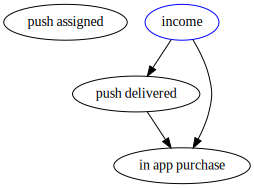

In [4]:
g = gr.Digraph()

g.node("push assigned")
g.edge("push delivered", "in app purchase")
g.edge("income", "in app purchase")
g.edge("income", "push delivered")
g.node("income", color="blue")
g

좋습니다. 그래서 우리는 Treatment의 인과적 효과를 추정하는 방법으로 Push assigned에 대한 인과적 효과를 제거했습니다. 그렇다면, Push delivered에 대한 Treatemnt를 활용해보는건 어떨까요?

$
ATE = E[Y | push=1] - E[Y | push=0]
$

다시 한 번 우리는 이것이 편향된 것인지, 아니면 
$E[Y_0|push=0] = E[Y_0|push=1]$ 인지 생각해볼 필요가 있습니다. 
여기서 측정되지 않은 Confounder인 수입이 분명히 인과추론을 어렵게 할 것 같습니다. 앞서 말했듯이, 우리의 경우 Push 전달의 실패는 구형 스마트폰을 가진 고객들에 의해 발생한다는 것을 알고 있습니다. 즉,  $E[Y_0|push=0] < E[Y_0|push=1]$ 가 존재할 수 있습니다. 우리는 비교적 적은 수입(income)을 가진 고객들이 구형 스마트폰을 가지고 있기 때문에 $push=0$ 로 이어지고, 인앱 구매 $Y_0$ 의 가능성도 낮습니다.

따라서 Treatment나 Treatment를 받지 않는 사람을 이용해서 ATE를 추정할수 없습니다.

하지만 다행이도, 우리는 도구변수를 활용할 수 있습니다. 여기서 Treatment에 대한 할당 여부는 완벽한 도구변수로 활용할 수 있습니다. 이는 랜덤과 같으며, Treatment으로 인해 앱 내 구매만을 유도합니다. 

## Local Average Treatment Effect: LATE

Local average treatment effect는 인과 관계를 추정할 수 있는 모집단을 명시합니다. 그것은 IV를 바라보는 또다른 관점으로 활용할 수 있는 직관을 제공합니다. IV에서 우리는 도구변수를 인과 사실의 시삭점으로 봅니다. 즉, Z는 Y를 일으키는 T를 유발합니다. 이러한 관점에서, T에 대한 영향이 없는 한 Z가 Y의 인과가 아닌것을 의미합니다. 1단계에서는 이제 Z가 T에 미치는 인과적 효과로 간주합니다. 또한 이중 인덱스 표기법으로 잠재적 결과를 다시 작성하는데, 여기서 첫 번째 인덱스는 도구변수에 대한 반사실적, 두 번째 인덱스는 Treatment에 대한 반사실적임을 나타냅니다.

$
\text{Potential Outcome}=\begin{cases}
Y_i(1, 1) \ \text{if } T_i=1, \ Z_i=1\\
Y_i(1, 0) \ \text{if } T_i=1, \ Z_i=0\\
Y_i(0, 1) \ \text{if } T_i=0, \ Z_i=1\\
Y_i(0, 0) \ \text{if } T_i=0, \ Z_i=0\\
\end{cases}
$

어떠한 의미에서는 Treatment는 적어도 첫 번째 단계에서 Outcome를 제공합니다. 이것은 우리가 또 Potential outcome framework로 작성할 수 있다는 것을 의미합니다.

$
\text{Potential Treatment}=\begin{cases}
T_0 \ \text{if } Z_i=0 \\
T_1 \ \text{if } Z_i=1
\end{cases}
$

![img](./data/img/late/double_index.png)

이제 Instrumental Variable 가정을 아래와 같이 다시 작성할 수 있습니다.

1. $T_{0i}, T_{1i} \perp Z_i $ and $Y_i(T_{1i},1), Y_i(T_{0i},0) \perp Z_i $. 이는 독립성 가정(independence Assumption) 입니다. 즉, 도구가 무작위로 할당된 것과 같다는 의미입니다. 다시 말해, 도구변수 Z는 잠재적인 Treatment와 상관관계가 없으며, 이는 다른 도구변수 그룹에 속한 사람과 비교가능(Comparable)하다는 것을 말합니다.  

2. $Y_i(1, 0)=Y_i(1, 1)=Y_{i1}$ and $Y_i(0, 0)=Y_i(0, 1)=Y_{i0}$. 이 수식은 배제 제약(exclusion restriction)입니다. Treatment에 대한 잠재적인 결과는 두 도구 변수 그룹 모두 동일하다는 것입니다. 즉, 도구 변수는 잠재적인 결과에 영향을 미치지 않으며, 이는 도구 변수가 Treatment를 통해서만 결과에 영향을 미친다는 것과 같습니다.

3. $E[T_{1i}-T_{0i}] \neq 0$. 이는 1단계의 잠재 결과, 즉 잠재적인 Treatment가 같지 않다는 것을 의미합니다. 또 다른 표현으로는 도구 변수가 Treatment에 영향을 미친다는 것입니다.


4. $T_{i1} > T_{i0}$. 이는 도구 변수의 단조성 가정 (monotonicity)입니다. 모든 그룹에서 도구 변수를 활용한다면, Treatment가 꺼진 경우보다 Treatment에 대한 level이 더 높아 진다는 것을 의미합니다. 

이제, Wald 추정기를 통해 IV에 대한 추가적인 직관을 얻어봅시다.

$
ATE = \dfrac{E[Y|Z=1]-E[Y|Z=0]}{E[T|Z=1]-E[T|Z=0]}
$

첫번재 부분인 $E[Y|Z=1]$ 을 우선 살펴보겠습니다. 배제 제약(exclusion restriction)을 활용해 Potential outcome Framework의 관점에서 Y를 다시 작성할 수 있습니다.

$
E[Y_i|Z_i=1]=E[Y_{i0} + T_{i1}(Y_{i1} - Y_{i0})|Z=1]
$

그리고 독립성 가정(independence Assumption)을 이용하여 Z에 대한 조건화를 제거할 수 있습니다.

$
E[Y_i|Z_i=1]=E[Y_{i0} + T_{i1}(Y_{i1} - Y_{i0})]
$

비슷하게, 우리는 아래와 같은 식을 얻을 수 있습니다.

$
E[Y_i|Z_i=0]=E[Y_{i0} + T_{i0}(Y_{i1} - Y_{i0})]
$

Wald 추정기의 분자를 다음과 같이 다시 써봅시다.

$
E[Y|Z=1]-E[Y|Z=0] = E[(Y_{i1}-Y_{i0})(T_{i1}-T_{i0})]
$

도구변수의 단조성 가정을 활용한다면, $T_{i1}-T_{i0}$ 이 0 또는 1이라는 것을 알 수 있습니다. 따라서,

$
E[(Y_{i1}-Y_{i0})(T_{i1}-T_{i0})] = E[(Y_{i1}-Y_{i0})|T_{i1}>T_{i0}]P(T_{i1}>T_{i0})
$

이제 분모를 처리하기 위해 비슷한 방법으로, 아래와 같은 식을 얻을 수 있습니다.

$
E[T|Z=1]-E[T|Z=0]=E[T_{i1}-T_{i0}]=P(T_{i1}>T_{i0})
$

즉, 아래와 같은 Wald 추정기를 확인할 수 있습니다.

$
ATE = \dfrac{E[(Y_{i1}-Y_{i0})|T_{i1}>T_{i0}]P(T_{i1}>T_{i0})}{P(T_{i1}>T_{i0})}=E[(Y_{i1}-Y_{i0})|T_{i1}>T_{i0}]
$

따라서, IV에 의해 추정된 ATE는 $T_{i1}>T_{i0}$ 인 부분 모집단의 ATE입니다. 그리고 compliance에 대해서 생각해보면, 어떠한 집단이 이에 해당할까요? 이 집단은 도구 변수를 설정한 사용자가 도구 변수를 해제한 경우보다 Treatment에 대한 수준이 높은 모집단입니다. 즉, Complier 입니다.  

1. Compilers $T_{i1}>T_{i0}$ 
2. Never Takers $T_{i1}=T_{i0}=0$
3. Always Takers $T_{i1}=T_{i0}=1$

결론은, IV는 Never Taker, Always Takers 또는 defiers에 미치는 영향에 대해서는 말을 해주지 않는다는 것입니다. 왜냐하면 그들의 Treatment가 변화되지 않으니깐요. 즉, IV는 Comilers에 대한 Treatment 효과를 찾아줍니다. 


## Effect on Engagement

다시 돌아와서, 앱 내 구매에 대한 Push 효과를 추정하는 사례에서 위에서 배운 것이 어떻게 진행되는지 알아보겠습니다.

인과 그래프는 위에서 본것과 같기 때문에 여기서 반복하지는 않겠습니다. 우리가 가지고 있는 데이터는 Push 할당과 Push 전달에 대한 Treatment 변수 그리고 in app의 구매에 대한 정보입니다.

In [7]:
data = pd.read_csv("./data/app_engagement_push.csv")
    
data.head()

,in_app_purchase,push_assigned,push_delivered
0,47,1,1
1,43,1,0
2,51,1,1
3,49,0,0
4,79,0,0


First, let's run OLS to see what it would give us.

In [8]:
ols = IV2SLS.from_formula("in_app_purchase ~ 1 + push_assigned + push_delivered", data).fit()
ols.summary.tables[1]

,Parameter,Std. Err.,T-stat,P-value,Lower CI,Upper CI
Intercept,69.292,0.3624,191.22,0.0000,68.581,70.002
push_assigned,-17.441,0.5702,-30.590,0.0000,-18.559,-16.324
push_delivered,27.600,0.6124,45.069,0.0000,26.399,28.800


OLS는 Treatment 효과가 BRL 27.60이며, 이는 Push를 하면 앱내 구매가 27.6 만큼 오른다는 것을 의미합니다. 그러나, 우리는 이것이 편향된 추정치라고 믿을만한 근거가 있습니다. 우리는 옛날 스마트폰이 Push 메세지를 받기에 어려움을 겪고 있다는 것을 알고 있습니다. 그래서 아마도, 더 부유한 고객들은, 새로운 전화기를 가진 Compiler 일 것입니다. Treatment 받는 사람들은 더 많은 수입이 있기 때문에, 우리는 이러한 편향이 Positive일 것이며, 실제 인과 효과는 더 낮다고 생각할 수 있습니다. 즉, $E[Y_0|T=0] < E[Y_0|T=1]$ 이 존재할 수 있습니다.

이제, 도구변수를 활용해서 해당 효과를 추정해 보겠습니다. 먼저 첫번째 Stage를 진행해보겠습니다.

In [9]:
first_stage = IV2SLS.from_formula("push_delivered ~ 1 + push_assigned", data).fit()
first_stage.summary.tables[1]

,Parameter,Std. Err.,T-stat,P-value,Lower CI,Upper CI
Intercept,2.22e-16,4.09e-10,5.429e-07,1.0000,-8.016e-10,8.016e-10
push_assigned,0.7176,0.0064,112.07,0.0000,0.7050,0.7301


Push를 받도록 할당된 사람들은 71.8%의 확률로 Push를 받습니다. 이것은 Never takers가 28%가 된다는 것을 의미합니다. 또한 intercept의 Parameter가 0으로 추정되기 때문에 always takers는 없다는 것을 믿을 수 있습니다. 이것은 할당되지 않은 경우 아무도 Push를 받지 못한다는 것을 의미하며, 실험 설계를 고려할 때 예상할 수 있습니다.

다음으로 push_delivered 제거된 식으로 회귀 분석을 진행해보도록 하겠습니다.

In [10]:
reduced_form = IV2SLS.from_formula("in_app_purchase ~ 1 + push_assigned", data).fit()
reduced_form.summary.tables[1]

,Parameter,Std. Err.,T-stat,P-value,Lower CI,Upper CI
Intercept,69.292,0.3624,191.22,0.0000,68.581,70.002
push_assigned,2.3636,0.5209,4.5376,0.0000,1.3427,3.3845


축소된 형식으로 Treatment 할당에 대한 인과 효과는 2.36임을 보여줍니다. 이는 Push를 받을 누군가를 지정하면 인앱 구매가 2.36 만큼 증가한다는 것을 의미합니다. 

축소된 형태를 첫 번째 단계로 나누고, instrument의 효과를 Treatment의 단위로 확장한다면 $2.3636/0.7176=3.29$ 를 얻을 수 있습니다. 2SLS를 실행하면 표준 오차와 함께 이와 동일한 추정치를 얻을 수 있습니다.

In [11]:
iv = IV2SLS.from_formula("in_app_purchase ~ 1 + [push_delivered ~ push_assigned]", data).fit()
iv.summary.tables[1]

,Parameter,Std. Err.,T-stat,P-value,Lower CI,Upper CI
Intercept,69.292,0.3624,191.22,0.0000,68.581,70.002
push_delivered,3.2938,0.7165,4.5974,0.0000,1.8896,4.6981


이를 통해 2SLS의 결과가 OLS의 27.6보다 훨씬 낮다는 것을 확인할 수 있습니다. OLS로 추정된 인과 효과는 긍정적으로 편향되어 있으므로 이러한 결과는 타당해 보입니다. 또한 LATE에 대해서도 기억해야 합니다. 3.29는 Complier에 대한 ATE 입니다. 안타깝게도, Never taker에 대해서는 해당 효과를 알 수 없습니다. 다시 말해, 최신 스마트폰을 가지고 있는 그룹에 대하여 해당 Push 마케팅이 미치는 결과를 추정하고 있음을 의미합니다. 

## Key Ideas

여기서 우리는 Instrumental Variables에 대한 보다 현대적인 관점을 살펴보았습니다. 우리는 IV가 결과를 초래하는 Treatment를 유발하는 인과적 사슬로 어떻게 볼 수 있는지 살펴보았습니다. 이러한 관점에서 우리는 IV 추정에서 ATE를 이해하기 위해 compliance를 살펴보았으며, 이것이 compiler에 대한 LATE라는 것을 알아보았습니다. 


## References

저는 이 책을 Joshua Angrist, Alberto Abadie 및 Christopher Walters의 대단한 계량 경제학 수업에 대한 찬사라고 생각하고 싶습니다. 이 자료에 있는 대부분의 아이디어는 전미경제학회(American Economic Association)의 수업에서 가져왔어요. 이렇게 좋은 참고자료를 지켜보는 것이 저의 2020년의 힘든 한 해 동안, 온전한 정신을 유지하도록 도와주었어요.

* [Cross-Section Econometrics](https://www.aeaweb.org/conference/cont-ed/2017-webcasts)
* [Mastering Mostly Harmless Econometrics](https://www.aeaweb.org/conference/cont-ed/2020-webcasts)


또한 Angrist의 정말 좋은 책들을 참고자료 목록에 담고 싶습니다. 이 책들은 계량경제학(Econometrics) 또는 '메트릭스(Metrics, 계량적 분석)'가 매우 유용할 뿐만 아니라 매우 재미있다는 것을 저에게 보여주었습니다.

* [Mostly Harmless Econometrics](https://www.mostlyharmlesseconometrics.com/)
* [Mastering 'Metrics](https://www.masteringmetrics.com/)

마지막으로 제가 참고한 자료는 Miguel Hernan과 Jamie Robins의 책입니다. 이 책들은 제가 대답해야 했던 까다로운 인과적인 질문에서 신뢰할 수 있는 동반자와 같은 존재였어요.

* [Causal Inference Book](https://www.hsph.harvard.edu/miguel-hernan/causal-inference-book/)

본문의 앞쪽의 맥주 비유는 JL Colins의 [주식 시리즈](https://jlcollinsnh.com/2012/04/15/stocks-part-1-theres-a-major-market-crash-coming-and-dr-lo)에서 가져왔습니다. 이 시리즈는 돈을 생산적으로 투자하는 방법을 배우려는 모든 분들께서 반드시 읽어야할 자료입니다.

![img](./data/img/poetry.png)

## Contribute

Causal Inference for the Brave and True는 인과추론, 통계학에 대한 오픈소스 자료입니다. 이 자료는 금전적으로나 지적으로 접근이 가능할 수 있도록 하는 것이 목표입니다. 그리고, 이 책은 Python 기반의 무료 소프트웨어만 사용해요.
여러분들께서 이 자료가 가치 있다고 생각하시고, 금전적으로 지원을 원하신다면 [Patreon](https://www.patreon.com/causal_inference_for_the_brave_and_true)를 방문해주세요. 
만약 여러분이 금전적으로 기여하기가 쉽지 않으시다면, 오타 수정, 수정 제안, 이해하기 난해한 부분에 대한 피드백 제공 등을 통해 도움을 주실 수 있어요. 이 책의 Github 저장소 [이슈 페이지](https://github.com/matheusfacure/python-causality-handbook/issues)를 방문해주세요. 마지막으로 이 자료가 여러분의 마음에 드셨다면 도움이 될 수 있는 다른 사람들과 공유해주시고, [이 책의 Github 자료에 star](https://github.com/matheusfacure/python-causality-handbook/stargazers) 부탁드립니다!